# **Clustering Analysis**
Understanding and Implementing K-Means and DBSCAN Algorithms

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

#Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
xls = pd.ExcelFile("/content/drive/MyDrive/Python excelr/EastWestAirlines.xlsx", engine="openpyxl")
print(xls.sheet_names)

['Description', 'data']


In [2]:
df = pd.read_excel("/content/drive/MyDrive/Python excelr/EastWestAirlines.xlsx", sheet_name="data", engine="openpyxl")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df1 = df.drop(['ID#'], axis=1)
#The code creates a new copy of the original DataFrame (df1) that is identical to df except that the ID# column is permanently removed.

In [6]:
# Check for missing values
df1.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [7]:
# Drop rows with any missing values
df1 = df1.dropna()
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


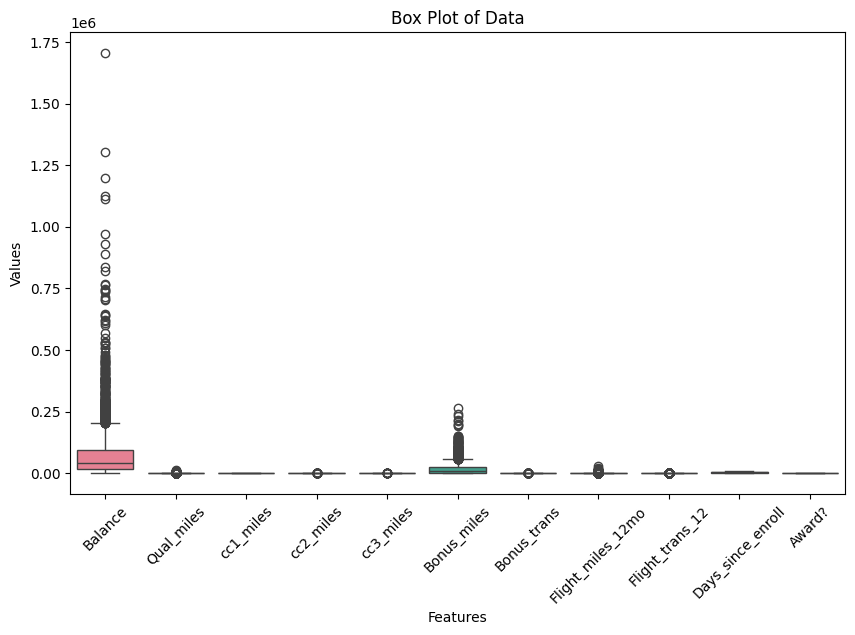

In [8]:
#3.Use multiple visualizations to understand the hidden patterns in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title('Box Plot of Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [9]:
#Scaling is done to normalize the range of independent variables (features) so that they contribute equally to the model’s learning process.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
# Convert to DataFrame
df_scaled_df = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [10]:
df_scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# Implementing Clustering Algorithms:

**Clustering in Machine Learning**
Clustering is an unsupervised learning technique that groups similar data points into clusters without using labels. Points in the same cluster are similar, and points in different clusters are dissimilar.


**Popular Clustering Algorithms:**

K-Means: Divides data into k clusters using centroids. Simple and fast but requires specifying k and is sensitive to outliers.

Hierarchical: Builds a tree (dendrogram) of clusters; does not need k but can be slow for large datasets.

DBSCAN: Groups points based on density, handles noise well, and detects arbitrary shapes; no need to specify k.

Mean Shift: Shifts points toward high-density regions; automatically determines cluster count but is computationally heavy.

Gaussian Mixture Model (GMM): Probabilistic approach assuming Gaussian distributions; handles overlapping clusters with soft assignments.


**Evaluation Metrics:**
Silhouette Score : how well clusters are separated.

Davies Bouldin Index : lower is better.

WCSS (Inertia) : compactness in K-Means.

**Applications:**
Customer segmentation, image processing, anomaly detection, document grouping, recommender systems.



# Kmeans algorithm:

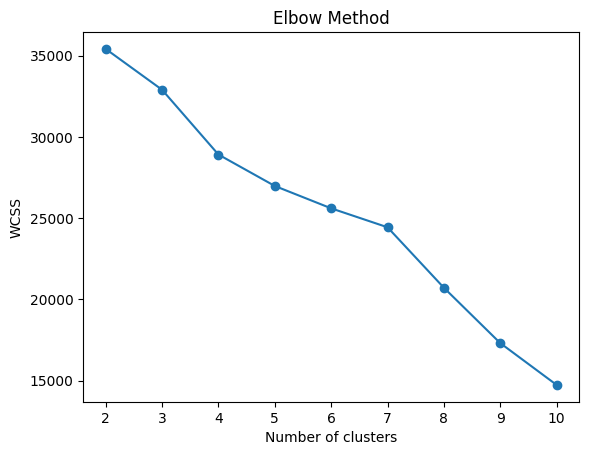

KMeans_Cluster
3    1186
2     989
1     841
0     839
4     144
Name: count, dtype: int64


In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) #kmeans.inertia is sum of squared distances of points from their cluster centroids. Lower WCSS = tighter clusters.

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method') #elbow method finds optimal cluster number.
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42) #we chose 5 clusters from this elbow
k_labels = kmeans.fit_predict(df_scaled)

df['KMeans_Cluster'] = k_labels
print(df['KMeans_Cluster'].value_counts()) #Shows how many points belong to each cluster

# DBSCAN algorithm:

In [15]:
from sklearn.cluster import DBSCAN

# define different parameter combinations to test
param_combinations = [
    {'eps': 2, 'min_samples': 5, 'name': 'Baseline (eps=2, min_samples=5)'},  # default baseline

    # exp 1: smaller eps = less tolerance for distance == smaller clusters and more noise
    {'eps': 0.5, 'min_samples': 5, 'name': 'Small Eps (eps=0.5, min_samples=5)'},

    # exp 2: larger eps = more tolerance for distance == fewer clusters and less noise
    {'eps': 4.0, 'min_samples': 5, 'name': 'Large Eps (eps=4.0, min_samples=5)'},

    # exp 3: larger min_samples = denser clusters required == fewer clusters, more noise
    {'eps': 2, 'min_samples': 15, 'name': 'Large MinPts (eps=2, min_samples=15)'}
]

results = []  # create an empty list to store results for each experiment

print("DBSCAN parameter experimentation summary")  # print header for clarity

# loop through each parameter set and run dbscan
for params in param_combinations:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])  # create dbscan model with given params
    labels = dbscan.fit_predict(df_scaled)  # fit model and get cluster labels for each data point

    # analyze the clustering results
    label_counts = pd.Series(labels).value_counts()  # count how many points are in each cluster
    num_clusters = len(label_counts[label_counts.index != -1])  # number of clusters excluding noise
    noise_points = label_counts.get(-1, 0)  # number of noise points (label -1)

    results.append({
        'Parameters': params['name'],
        'Number_of_Clusters': num_clusters,
        'Noise_Points': noise_points,
        'Cluster_Counts': label_counts.to_dict()
    })

    print(f"Run: {params['name']}")
    print(f"  Number of Clusters found: {num_clusters}")
    print(f"  Number of Noise Points (-1): {noise_points}")
    print(f"  Full Cluster Distribution:\n{label_counts}\n")


DBSCAN parameter experimentation summary
Run: Baseline (eps=2, min_samples=5)
  Number of Clusters found: 6
  Number of Noise Points (-1): 179
  Full Cluster Distribution:
 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
Name: count, dtype: int64

Run: Small Eps (eps=0.5, min_samples=5)
  Number of Clusters found: 16
  Number of Noise Points (-1): 1413
  Full Cluster Distribution:
 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 12       9
 13       9
 14       6
 2        5
 7        5
 11       5
 15       5
Name: count, dtype: int64

Run: Large Eps (eps=4.0, min_samples=5)
  Number of Clusters found: 4
  Number of Noise Points (-1): 30
  Full Cluster Distribution:
 0    3924
-1      30
 2      26
 1      14
 3       5
Name: count, dtype: int64

Run: Large MinPts (eps=2, min_samples=15)
  Number of Clusters found: 3
  Number of Noise Points (-1): 260
  Full Cluster Distribution:
 0    

In [16]:
# apply the best parameters on final model
# from the above output , we can say that the parameters eps=2,min_samples=5 are the best because they provide the most balanced and informative result.
#The baseline identifies 6 meaningful clusters while isolating only 179 noise points, successfully distinguishing dense groups without the excessive fragmentation seen with eps=0.5 (1413 noise points) or the extreme merging seen with eps=4.0 (one dominant cluster of 3924).

final_eps = 2
final_min_samples = 5

print(f"FINAL DBSCAN SELECTION: eps={final_eps}, min_samples={final_min_samples} ")

dbscan_final = DBSCAN(eps=final_eps, min_samples=final_min_samples)
df['DBSCAN_Cluster'] = dbscan_final.fit_predict(df_scaled)

print("\nFINAL Cluster Distribution:")
print(df['DBSCAN_Cluster'].value_counts())

FINAL DBSCAN SELECTION: eps=2, min_samples=5 

FINAL Cluster Distribution:
DBSCAN_Cluster
 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
Name: count, dtype: int64


# SILHOUETTE SCORE

Silhouette score measures how well each point fits into its cluster.\
Range: -1 to 1\
1: Points are well clustered.\
0: Points are on the border between clusters.\
-1: Points may be assigned to the wrong cluster.

In [20]:
from sklearn.metrics import silhouette_score
dbscan_final = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan_final.fit_predict(df_scaled) #defining the db_labels
mask = db_labels != -1  #to exclude noise points (labeled as -1) before calculating the silhouette score.
print("KMeans Silhouette Score:", silhouette_score(df_scaled, k_labels))
print("DBSCAN Silhouette Score:", silhouette_score(df_scaled[mask], db_labels[mask]))

KMeans Silhouette Score: 0.2005393837499611
DBSCAN Silhouette Score: 0.28053595722860075


# Visualization:

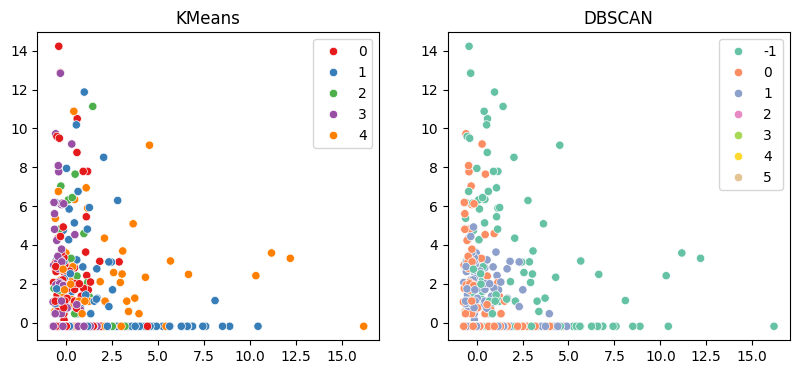

In [21]:
plt.figure(figsize=[15,4])
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=k_labels, palette='Set1')
plt.title("KMeans")
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=db_labels, palette='Set2')
plt.title("DBSCAN")
plt.show()

In [22]:
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())
#Groups your DataFrame rows based on the specific cluster labels.Cluster 0= low and Cluster 1= high.

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1945.497020   58124.779499  193.427890   1.699642   1.019070   
1               1563.870392  139193.010702  145.376932   4.195006   1.002378   
2               1158.110212   59918.329626   70.803842   1.495450   1.020222   
3               3127.675379   34546.727656   93.012648   1.247049   1.011804   
4               1770.708333  196333.680556  773.805556   2.250000   1.041667   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  10816.562574    10.760429         417.281287   
1                1.057075  51174.633769    20.095125         383.443520   
2                1.001011   6402.407482     8.601618         177.680485   
3                1.000000   4428.688027     6.623946         141

**Revised Insights:**

In this assignment, the dataset was preprocessed and scaled before applying clustering algorithms. K-Means identified well-defined clusters (k=5) with silhouette scores indicating good separation.\
The implementation of DBSCAN required systematic experimentation with parameters eps and MinPts to find an optimal density perspective. We observed that a small eps (0.5) led to excessive data fragmentation and a high noise count (1413 points), while a large eps (4.0) caused significant cluster merging, resulting in one dominant cluster.\
The final parameters (eps=2,min_samples=5) were selected as they provided the most balanced result, identifying 6 distinct clusters and an acceptable amount of noise (179 points).\
Cluster analysis revealed specific customer segments, such as Frequent Flyers (high balance, miles, and award usage) and Inactive Travelers (low activity).

 The DBSCAN noise points (-1) were successfully detected as irregular or one-time users requiring separate handling.\
Visualizations highlighted cluster separation, and feature averages helped interpret customer behavior. Overall, the diversity of clusters enables personalized services, and validation metrics confirm the effectiveness of the clustering results.
